# I.- Travel Marketing Machine Learning Pipeline: Exploratory Data Analysis

There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Model Building

**This is the notebook for step 1: Data Analysis**

**The purpose of these notebooks is to provide an idea of the steps that must be covered when preparing a machine learning model for deployment.**


===================================================================================================

## Predicting Repeat Customers in the Travel Business

The aim of the project is to build a machine learning model to predict which customers of a travel agency are going to be repeat customers. 

### Why is this important? 

The travel agency is giving out too many discounted packages without ROI - they want to send discounted offers only to customers that will repeat. On the other hand, they want to reduce churn by sending targeted marketing to customers who are likely to defect.

### What is the objective of the machine learning model?

We aim to identify customers that will repeat using data describing each customer's socioeconomic status and interests. 

====================================================================================================


## Travel marketing dataset: Exploratory Data Analysis

In the following cells, we will perform exploratory data analysis for the variables found in the "travelChurn_20k.csv" dataset. If you want to know more about this dataset, please have a look at **travel marketing reduced data dictionary.xlsx**

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# maximum number of dataframe rows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# random seed
RANDOM_STATE = 801
pd.options.mode.chained_assignment = None

In [2]:
# load dataset
data0 = pd.read_csv('travelChurn_20k.csv')

# rows and columns 
print(data0.shape)

# inspect the dataset
data0.head()

(20000, 18)


,repeat,Gender,Age_Range,Income_Range,Occupation,Household_Type,Length_of_Residence,Home_Value_Range,Wealth_Rank,Mail_Buyer,Ecommerce_Behav_Rank,Upscale_Retail_Shopper,Premium_Bank_Card,Books_Behav,Family_Behav,Health_Magazine,Personal_Travel,Sporting_Goods_Interest
0,0,M,45-54 Years Old,"$100,000 - $124,999",Executive/Administrator,Adult Male & Adult Female Present,In the 6th Year,"$250,000 - $300,000",8,,9,Y,Y,1,,0,Y,U
1,0,M,45-54 Years Old,"$75,000 - $99,999",Unknown,Adult Male & Adult Female Present,In the 14th Year,"$150,000 - $200,000",8,,5,U,U,0,,0,U,U
2,0,M,24-34 Years Old,"$100,000 - $124,999",Unknown,Adult Male & Adult Female Present,In the 2nd Year,"$600,000 - $650,000",9,,8,,,2,,1,,
3,1,M,24-34 Years Old,"$75,000 - $99,999",Unknown,Adult Male & Adult Female Present,In the 6th Year,"$100,000 - $150,000",8,,5,U,U,3,,2,U,U
4,0,M,55-64 Years Old,"$125,000 - $149,999",Unknown,Unknown,In the 1st Year,Unknown,3,,10,,,0,,0,,


In [3]:
# feature types
data0.dtypes

repeat                      int64
Gender                     object
Age_Range                  object
Income_Range               object
Occupation                 object
Household_Type             object
Length_of_Residence        object
Home_Value_Range           object
Wealth_Rank                object
Mail_Buyer                 object
Ecommerce_Behav_Rank       object
Upscale_Retail_Shopper     object
Premium_Bank_Card          object
Books_Behav                object
Family_Behav               object
Health_Magazine            object
Personal_Travel            object
Sporting_Goods_Interest    object
dtype: object

The dataset contains 20000 rows, and 18 columns. The only numeric feature is the target: 'repeat', all other features are categorical. The unit of analysis is a unique customer.

We find that all features (except the target) are read as strings from the dataset; for this reason we will replace blanks with nans, then we will find the percentage of missing values for each feature.

In [4]:
# replace blanks with nan
data1 = data0.replace(r'^\s*$', np.nan, regex=True)

In [5]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data1.columns if data1[var].isnull().sum() > 0]

# determine percentage of missing values
data1[vars_with_na].isnull().mean()*100

Wealth_Rank                 9.295
Mail_Buyer                 10.260
Ecommerce_Behav_Rank        9.295
Upscale_Retail_Shopper     30.790
Premium_Bank_Card          30.790
Books_Behav                 9.295
Family_Behav               10.260
Health_Magazine             9.295
Personal_Travel            30.790
Sporting_Goods_Interest    30.790
dtype: float64

The dataset contains variables with missing values; for some features the percentage of missing values can be as high as 30%. We need to account for this in the following notebook, where we will engineer the variables for use in a machine learning model.

After closer inspection we find that there are a number of ordinal variables that are read as strings. We need to make a distinction between these and nominal variables by transforming the ordinal variables into integers:

In [6]:
CATEGORICAL_NOMINAL = ['Gender', 'Age_Range', 'Income_Range', 'Occupation', 'Household_Type', 'Length_of_Residence',
                       'Home_Value_Range', 'Upscale_Retail_Shopper', 'Premium_Bank_Card', 'Personal_Travel', 
                       'Sporting_Goods_Interest']

In [7]:
CATEGORICAL_INT = ['Wealth_Rank', 'Mail_Buyer', 'Ecommerce_Behav_Rank', 'Books_Behav', 'Family_Behav', 
                   'Health_Magazine']

In [8]:
# nominal vareiables are transformed from strings to float, then to integers
data1[CATEGORICAL_INT] = data1[CATEGORICAL_INT].astype(float).astype(pd.Int32Dtype())

In [9]:
# we double-check feature types
data1.dtypes

repeat                      int64
Gender                     object
Age_Range                  object
Income_Range               object
Occupation                 object
Household_Type             object
Length_of_Residence        object
Home_Value_Range           object
Wealth_Rank                 Int32
Mail_Buyer                  Int32
Ecommerce_Behav_Rank        Int32
Upscale_Retail_Shopper     object
Premium_Bank_Card          object
Books_Behav                 Int32
Family_Behav                Int32
Health_Magazine             Int32
Personal_Travel            object
Sporting_Goods_Interest    object
dtype: object

**In the following cells we will analyse the dataset to identify:**

1. Missing values
2. Categorical variables
3. Cardinality of the categorical variables
4. Potential relationships between the variables and the target: **repeat**

# 1.- Missing values

#### Relationship between missing values and target

Let's evaluate the relationship between missing values and the target for those observations where the information is missing.

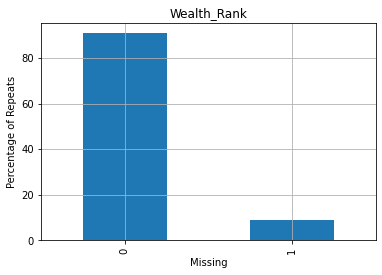

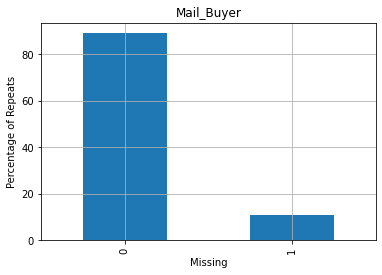

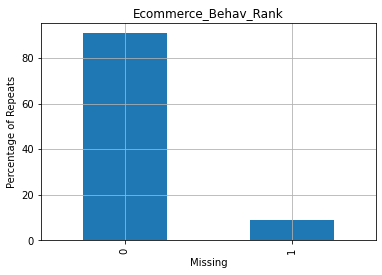

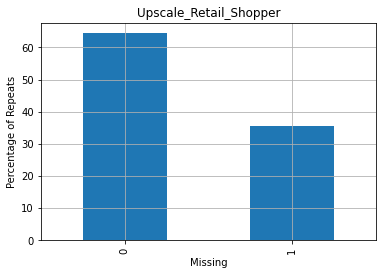

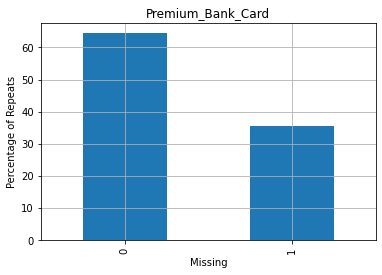

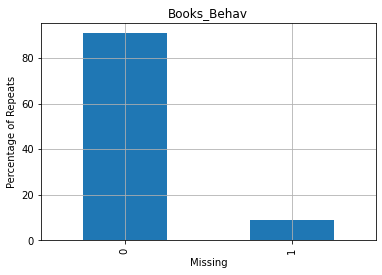

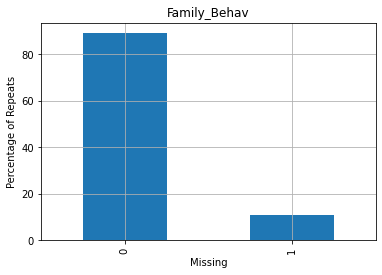

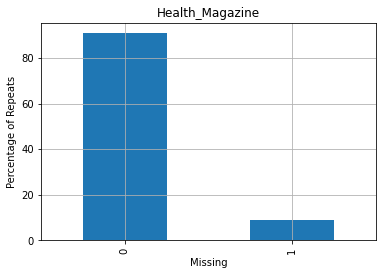

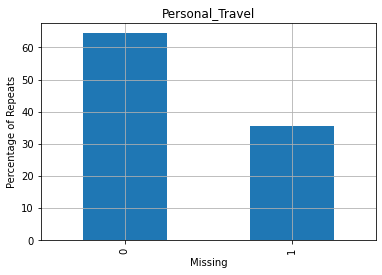

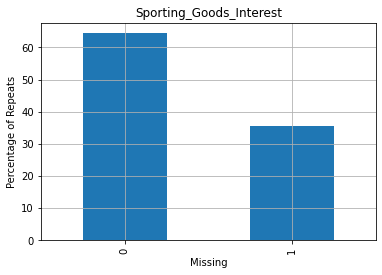

In [10]:
def analyse_na_value(df, var):

    df = df.copy()

    # Create a variable that indicates 1 if the observation is missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Compare the sum of repeats in the observations where data is missing
    # vs the observations where a value is available
    (df.groupby(var)['repeat'].sum()*100/df['repeat'].sum()).plot.bar()

    plt.title(var)
    plt.ylabel('Percentage of Repeats')
    plt.xlabel('Missing')
    plt.grid()

    plt.show()
    
# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data1, var)    

There are some variables in which the proportion of missing values associated with repeat customers is large: 'Upscale_Retail_Shopper', 'Premium_Bank_Card', 'Personal_Travel' and 'Sporting_Goods_Interest'. It must be borne in mind that this is something that will affect the performance of our model.

# 2.- Numerical variables

Let's go ahead and find out about the numerical variables in the dataset. 

In [11]:
# make list of numerical variables
num_vars = [var for var in data1.columns if data1[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data1[num_vars].head()

Number of numerical variables:  7


,repeat,Wealth_Rank,Mail_Buyer,Ecommerce_Behav_Rank,Books_Behav,Family_Behav,Health_Magazine
0,0,8,<NA>,9,1,<NA>,0
1,0,8,<NA>,5,0,<NA>,0
2,0,9,<NA>,8,2,<NA>,1
3,1,8,<NA>,5,3,<NA>,2
4,0,3,<NA>,10,0,<NA>,0


The only truly numerical variable is the target: 'repeat' - it contains no missing values. The remaining numerical variables represent ordinal variables.

# 3.- Nominal features

Let's analyse the nominal variables present in the dataset.

In [12]:
# capture nominal variables in a list
nominal_vars = [var for var in data1.columns if data1[var].dtypes == 'O']

print('Number of nominal variables: ', len(nominal_vars))

Number of nominal variables:  11


In [13]:
nominal_vars

['Gender',
 'Age_Range',
 'Income_Range',
 'Occupation',
 'Household_Type',
 'Length_of_Residence',
 'Home_Value_Range',
 'Upscale_Retail_Shopper',
 'Premium_Bank_Card',
 'Personal_Travel',
 'Sporting_Goods_Interest']

In [14]:
# let's have a look at the values taken by the nominal variables
data1[nominal_vars].head()

,Gender,Age_Range,Income_Range,Occupation,Household_Type,Length_of_Residence,Home_Value_Range,Upscale_Retail_Shopper,Premium_Bank_Card,Personal_Travel,Sporting_Goods_Interest
0,M,45-54 Years Old,"$100,000 - $124,999",Executive/Administrator,Adult Male & Adult Female Present,In the 6th Year,"$250,000 - $300,000",Y,Y,Y,U
1,M,45-54 Years Old,"$75,000 - $99,999",Unknown,Adult Male & Adult Female Present,In the 14th Year,"$150,000 - $200,000",U,U,U,U
2,M,24-34 Years Old,"$100,000 - $124,999",Unknown,Adult Male & Adult Female Present,In the 2nd Year,"$600,000 - $650,000",NaN,NaN,NaN,NaN
3,M,24-34 Years Old,"$75,000 - $99,999",Unknown,Adult Male & Adult Female Present,In the 6th Year,"$100,000 - $150,000",U,U,U,U
4,M,55-64 Years Old,"$125,000 - $149,999",Unknown,Unknown,In the 1st Year,Unknown,NaN,NaN,NaN,NaN


## 3.1.- Nominal features: cardinality

Let's evaluate how many different categories are present in each of the nominal variables. 

In [15]:
for var in nominal_vars:
    print(var, ': ', data1[var].unique())

Gender :  ['M' 'F' 'U']
Age_Range :  ['45-54 Years Old' '24-34 Years Old' '55-64 Years Old' '65-74 Years Old'
 '35-44 Years Old' '75+ Years Old' 'Unknown' '18-24 Years Old'
 '25-34 Years Old']
Income_Range :  ['$100,000 - $124,999' '$75,000 - $99,999' '$125,000 - $149,999'
 '$50,000 - $74,999' '$40,000 - $49,999' '$150,000 - $174,999'
 '$200,000 - $249,999' '$250,000+' '$175,000 - $199,999' 'Under $20,000'
 '$30,000 - $39,999' '$20,000 - $29,999']
Occupation :  ['Executive/Administrator' 'Unknown' 'Upper Management/Executive'
 'Homemaker' 'Sales/Marketing' 'Student' 'Retired' 'Self Employed'
 'Middle Management' 'Clerical/Office' 'Doctors/Physicians/Surgeons'
 'Skilled Trade/Machine/Laborer' 'Psychologists' 'Professional/Technical'
 'Beauty (Cosmetologist, Barber, Manicurist, Nails)' 'Counselors'
 'Attorneys' 'Accountants/CPA' 'Surveyors' 'Teacher/Educator'
 'Civil Servant' 'Military' 'Financial Services' 'Work from Home'
 'Health Services' 'Computer Professional'
 'Real Estate (Sales,

In [16]:
data1[nominal_vars].nunique()

Gender                      3
Age_Range                   9
Income_Range               12
Occupation                 34
Household_Type              7
Length_of_Residence        16
Home_Value_Range           17
Upscale_Retail_Shopper      2
Premium_Bank_Card           2
Personal_Travel             2
Sporting_Goods_Interest     2
dtype: int64

All nominal variables show low cardinality - therefore we won't need to tackle this in the feature engineering stage.

## 3.2.- Nominal features: rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of cases:

In [17]:
def analyse_rare_labels(df, var, rare_perc):
    
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['repeat'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in nominal_vars:
    print(analyse_rare_labels(data1, var, 0.01))
    print()

Gender
U    0.00955
Name: repeat, dtype: float64

Age_Range
18-24 Years Old    0.00560
25-34 Years Old    0.00820
75+ Years Old      0.00885
Name: repeat, dtype: float64

Series([], Name: repeat, dtype: float64)

Occupation
Accountants/CPA                                      0.00035
Attorneys                                            0.00085
Beauty (Cosmetologist, Barber, Manicurist, Nails)    0.00020
Civil Servant                                        0.00005
Clergy                                               0.00010
Computer Professional                                0.00010
Counselors                                           0.00010
Dentist/Dental Hygienist                             0.00015
Doctors/Physicians/Surgeons                          0.00130
Engineers                                            0.00010
Financial Services                                   0.00010
Health Services                                      0.00005
Homemaker                                   

Some of the nominal features show multiple labels that are present in less than 1% of the customers. **Categories that are under-represented in the dataset tend to cause over-fitting of machine learning models.** That is why we may want to engineer these under-represented labels.

## 3.3.- Relationship between nominal features and customer repeat.

In [18]:
# this function computes the number of repeats for each value of a categorical variable 
def analyse_categorical(df, var):
    df = df.copy()
    df.groupby(var)['repeat'].sum().plot.bar()
    plt.title(var)
    plt.ylabel('Total Repeats')
    plt.show() 

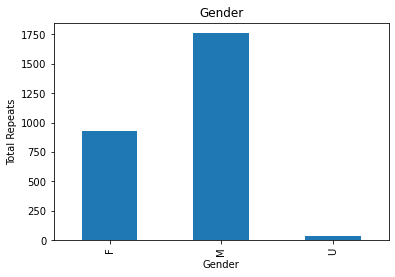

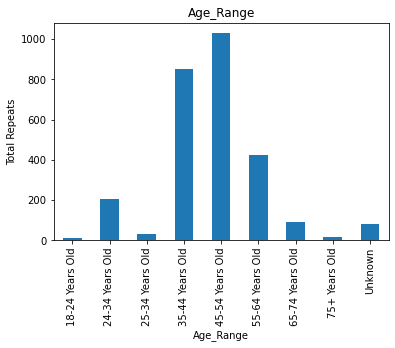

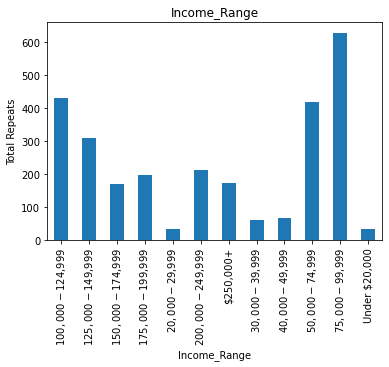

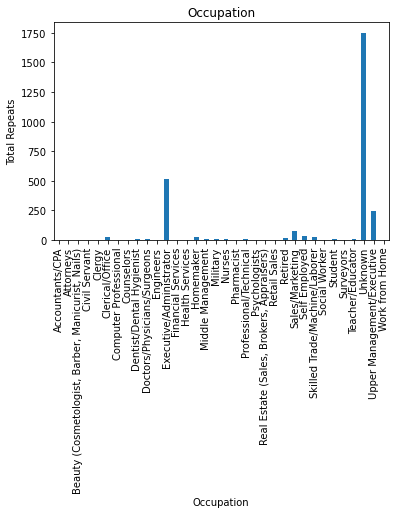

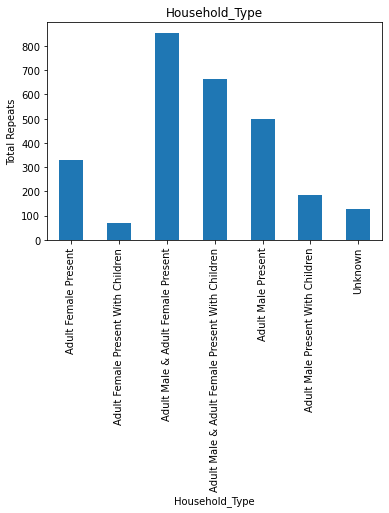

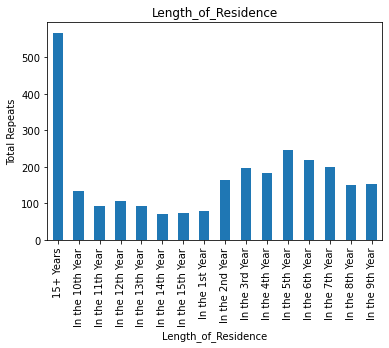

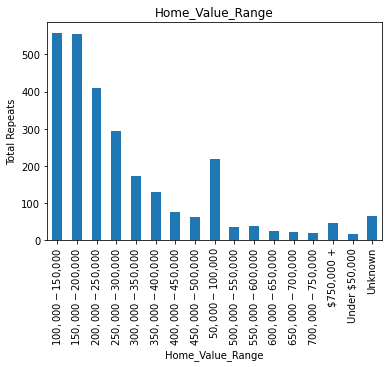

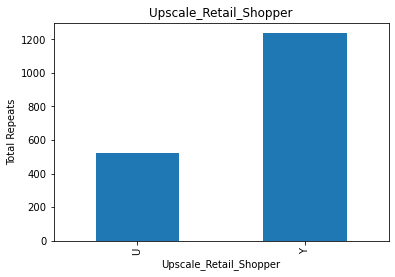

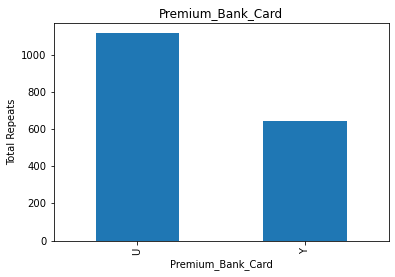

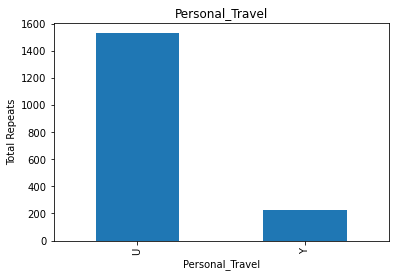

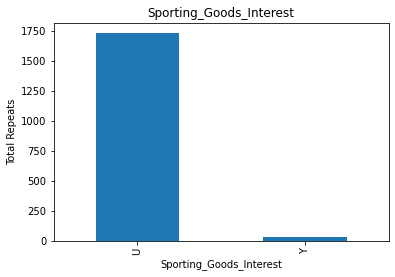

In [19]:
for var in nominal_vars:

    analyse_categorical(data1, var)

We observe that there isn't a clear monotonic relationship between the categories observed in the nominal features and the number of repeats. We may want to enforce such a relation for some types of machine learning models.

# 4.- Ordinal features

We will analyse the ordinal variables present in the dataset.

In [20]:
# capture ordinal variables in a list
ordinal_vars = [var for var in data1.columns if data1[var].dtypes != 'O' and var != 'repeat']

print('Number of nominal variables: ', len(ordinal_vars))

Number of nominal variables:  6


In [21]:
ordinal_vars

['Wealth_Rank',
 'Mail_Buyer',
 'Ecommerce_Behav_Rank',
 'Books_Behav',
 'Family_Behav',
 'Health_Magazine']

In [22]:
# let's have a look at the values taken by the ordinal features
data1[ordinal_vars].head()

,Wealth_Rank,Mail_Buyer,Ecommerce_Behav_Rank,Books_Behav,Family_Behav,Health_Magazine
0,8,<NA>,9,1,<NA>,0
1,8,<NA>,5,0,<NA>,0
2,9,<NA>,8,2,<NA>,1
3,8,<NA>,5,3,<NA>,2
4,3,<NA>,10,0,<NA>,0


## 4.1.- Ordinal features: cardinality

Let's evaluate how many different categories are present in each of the ordinal variables. 

In [23]:
for var in ordinal_vars:
    print(data1[var].unique())

<IntegerArray>
[8, 9, 3, 5, 6, 7, 1, 0, 4, 2, <NA>]
Length: 11, dtype: Int32
<IntegerArray>
[<NA>, 2, 0, 1]
Length: 4, dtype: Int32
<IntegerArray>
[9, 5, 8, 10, 7, 6, 2, 4, 3, 1, <NA>]
Length: 11, dtype: Int32
<IntegerArray>
[1, 0, 2, 3, 4, 5, 8, 6, 9, 7, <NA>]
Length: 11, dtype: Int32
<IntegerArray>
[<NA>, 1, 0, 2, 3, 5, 4, 6, 7, 8]
Length: 10, dtype: Int32
<IntegerArray>
[0, 1, 2, 5, 6, 3, 4, 7, 8, 9, <NA>]
Length: 11, dtype: Int32


In [24]:
data1[ordinal_vars].nunique()

Wealth_Rank             10
Mail_Buyer               3
Ecommerce_Behav_Rank    10
Books_Behav             10
Family_Behav             9
Health_Magazine         10
dtype: int64

All ordinal variables show low cardinality - therefore we won't need to tackle cardinality in the feature engineering stage.

## 3.2.- Nominal features: rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of cases:

In [25]:
def analyse_rare_labels(df, var, rare_perc):
    
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['repeat'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in ordinal_vars:
    print(analyse_rare_labels(data1, var, 0.01))
    print()

Wealth_Rank
0    0.0072
Name: repeat, dtype: float64

Series([], Name: repeat, dtype: float64)

Ecommerce_Behav_Rank
1    0.0032
2    0.0099
Name: repeat, dtype: float64

Books_Behav
7    0.00815
8    0.00550
9    0.00825
Name: repeat, dtype: float64

Family_Behav
4    0.00840
5    0.00270
6    0.00080
7    0.00015
8    0.00005
Name: repeat, dtype: float64

Health_Magazine
6    0.00925
7    0.00500
8    0.00185
9    0.00145
Name: repeat, dtype: float64



Some of the ordinal features show multiple labels that are present in less than 1% of the customers. **Categories that are under-represented in the dataset tend to cause over-fitting of machine learning models.** That is why we may want to engineer these under-represented labels.

## 4.3.- Relationship between ordinal features and customer repeat.

In [26]:
# this function computes the count of repeats for each value of a categorical feature 
def analyse_categorical(df, var):
    df = df.copy()
    df.groupby(var)['repeat'].sum().plot.bar()
    plt.title(var)
    plt.ylabel('Total Repeats')
    plt.show() 

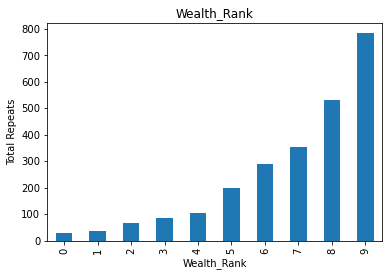

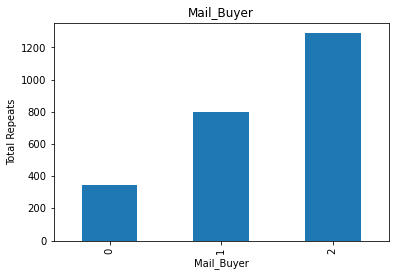

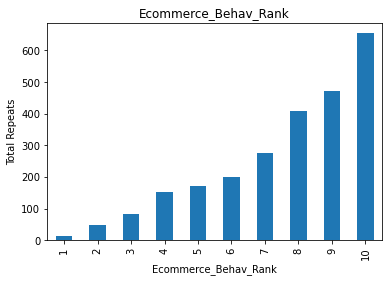

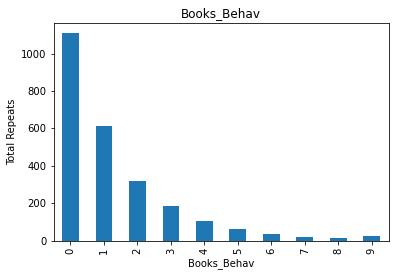

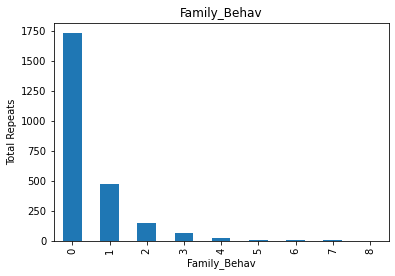

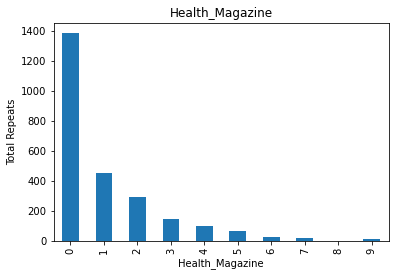

In [27]:
for var in ordinal_vars:

    analyse_categorical(data1, var)

We observe nice monotonic relationships between the categories observed in any nominal feature and the count of repeats. 

## 4.4.- Distribution of ordinal features

We want to have an idea about the distribution of the values that the ordinal features take - this is something that will become useful when imputing missing values.

In [28]:
# this function computes the number of repeats for each value of a categorical variable 
def ordinal_distribution(df, var):
    df = df.copy()
    df[var].hist()
    plt.title(var)
    plt.show() 

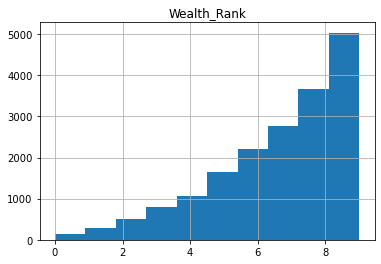

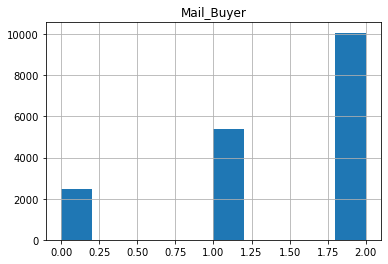

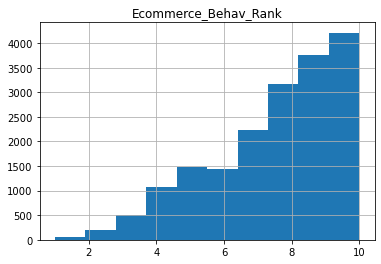

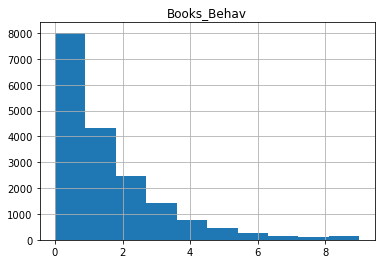

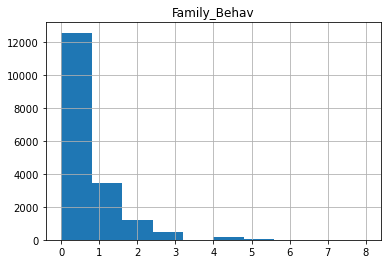

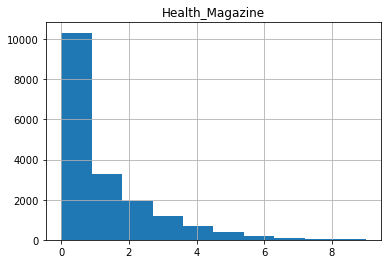

In [29]:
for var in ordinal_vars:
    ordinal_distribution(data1, var)

As observed above, the distributions of the ordinal features are strongly skewed - this suggests using the mode when imputing missing values. Furthermore, none of the ordinal features has more than 11% missing values.  

This completes the exploratory data analysis. In the next notebook we will deal with feature engineering.